In [ ]:
!pip install textblob
!pip install textsearch
!pip install contractions
!pip install afinn
import nltk
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [ ]:
#Beautiful soup
from bs4 import BeautifulSoup
import tqdm
import re
import unicodedata
import numpy as np
import contractions
import pandas as pd

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
import unicodedata
def strip_html_tags(text):
  soup = BeautifulSoup(text,'html.parser')
  stripped_text = soup.get_text()
  stripped_text = re.sub("[\r|\n|\r\n]+",'\n',stripped_text)
  return stripped_text

In [ ]:
stop_words = nltk.corpus.stopwords.words('english')

In [ ]:
def remove_accented_characters(text):
  text = unicodedata.normalize("NFKD",text).encode('ascii','ignore').decode('utf-8','ignore')
  return text

In [ ]:
import string
import re
import tqdm
def pre_processing(doc):
  norm_corpus = []
  for text in tqdm.tqdm(doc):
    text = text.lower()
    text = contractions.fix(text)
    text = re.sub(r'[^a-zA-Z0-9\s]',' ',text,re.I)
    tokens = nltk.word_tokenize(text)
    text = text.strip
    filtered_tokens = [token for token in tokens if token not in stop_words]
    text = " ".join(filtered_tokens)
    text = re.sub(' +',' ',text)
    norm_corpus.append(text)
  return norm_corpus


In [ ]:
corpus= ["Inceptez is a great place to learn data science and big data",
         "data is called the next oil, so learn data science",
         "big data is the science of dealing with data at a scale"
         "data science can be simple filtering or sorting.",
         "data science is easy to learn"]

In [ ]:
corpus = np.array(corpus)
print(corpus)
normalized_corpus = pre_processing(corpus)

['Inceptez is a great place to learn data science and big data'
 'data is called the next oil, so learn data science'
 'big data is the science of dealing with data at a scaledata science can be simple filtering or sorting.'
 'data science is easy to learn']


100%|██████████| 4/4 [00:00<00:00, 1916.96it/s]


In [ ]:
normalized_corpus

['inceptez great place learn data science big data',
 'data called next oil learn data science',
 'big data science dealing data scaledata science simple filtering sorting',
 'data science easy learn']

In [ ]:
cv = CountVectorizer()
cv_matrix = cv.fit_transform(normalized_corpus)
cv_matrix = cv_matrix.toarray()
vocab = cv.get_feature_names_out()
pd.DataFrame(cv_matrix, columns = vocab)

,big,called,data,dealing,easy,filtering,great,inceptez,learn,next,oil,place,scaledata,science,simple,sorting
0,1,0,2,0,0,0,1,1,1,0,0,1,0,1,0,0
1,0,1,2,0,0,0,0,0,1,1,1,0,0,1,0,0
2,1,0,2,1,0,1,0,0,0,0,0,0,1,2,1,1
3,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0


In [ ]:
cv = CountVectorizer(binary = True)
cv_matrix = cv.fit_transform(normalized_corpus)
cv_matrix = cv_matrix.toarray()
vocab = cv.get_feature_names_out()
pd.DataFrame(cv_matrix, columns = vocab)

,big,called,data,dealing,easy,filtering,great,inceptez,learn,next,oil,place,scaledata,science,simple,sorting
0,1,0,1,0,0,0,1,1,1,0,0,1,0,1,0,0
1,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
2,1,0,1,1,0,1,0,0,0,0,0,0,1,1,1,1
3,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0


In [ ]:
#ngram vectors
cv = CountVectorizer(ngram_range = (2,2))
cv_matrix = cv.fit_transform(normalized_corpus)
cv_matrix = cv_matrix.toarray()
vocab = cv.get_feature_names_out()
pd.DataFrame(cv_matrix, columns = vocab)

,big data,called next,data called,data scaledata,data science,dealing data,easy learn,filtering sorting,great place,inceptez great,learn data,next oil,oil learn,place learn,scaledata science,science big,science dealing,science easy,science simple,simple filtering
0,1,0,0,0,1,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0
1,0,1,1,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0
2,1,0,0,1,1,1,0,1,0,0,0,0,0,0,1,0,1,0,1,1
3,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
#ngram vectors
cv = CountVectorizer(ngram_range = (2,3))
cv_matrix = cv.fit_transform(normalized_corpus)
cv_matrix = cv_matrix.toarray()
vocab = cv.get_feature_names_out()
pd.DataFrame(cv_matrix, columns = vocab)

,big data,big data science,called next,called next oil,data called,data called next,data scaledata,data scaledata science,data science,data science big,...,science big,science big data,science dealing,science dealing data,science easy,science easy learn,science simple,science simple filtering,simple filtering,simple filtering sorting
0,1,0,0,0,0,0,0,0,1,1,...,1,1,0,0,0,0,0,0,0,0
1,0,0,1,1,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,1,1,1,0,...,0,0,1,1,0,0,1,1,1,1
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0


In [ ]:
#ngram vectors
cv = CountVectorizer(ngram_range = (1,3))
cv_matrix = cv.fit_transform(normalized_corpus)
cv_matrix = cv_matrix.toarray()
vocab = cv.get_feature_names_out()
pd.DataFrame(cv_matrix, columns = vocab)

,big,big data,big data science,called,called next,called next oil,data,data called,data called next,data scaledata,...,science dealing,science dealing data,science easy,science easy learn,science simple,science simple filtering,simple,simple filtering,simple filtering sorting,sorting
0,1,1,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,2,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,2,0,0,1,...,1,1,0,0,1,1,1,1,1,1
3,0,0,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer()
tv_matrix = tv.fit_transform(normalized_corpus)
tv_matrix = tv_matrix.toarray()
vocab = tv.get_feature_names_out()
pd.DataFrame(tv_matrix, columns = vocab)

,big,called,data,dealing,easy,filtering,great,inceptez,learn,next,oil,place,scaledata,science,simple,sorting
0,0.339574,0.000000,0.449521,0.000000,0.000000,0.000000,0.430707,0.430707,0.274915,0.000000,0.000000,0.430707,0.000000,0.224761,0.000000,0.000000
1,0.000000,0.457916,0.477920,0.000000,0.000000,0.000000,0.000000,0.000000,0.292282,0.457916,0.457916,0.000000,0.000000,0.238960,0.000000,0.000000
2,0.282294,0.000000,0.373695,0.358054,0.000000,0.358054,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.358054,0.373695,0.358054,0.358054
3,0.000000,0.000000,0.373502,0.000000,0.715739,0.000000,0.000000,0.000000,0.456847,0.000000,0.000000,0.000000,0.000000,0.373502,0.000000,0.000000


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(ngram_range = (1,2))
tv_matrix = tv.fit_transform(normalized_corpus)
tv_matrix = tv_matrix.toarray()
vocab = tv.get_feature_names_out()
pd.DataFrame(tv_matrix, columns = vocab)

,big,big data,called,called next,data,data called,data scaledata,data science,dealing,dealing data,...,scaledata,scaledata science,science,science big,science dealing,science easy,science simple,simple,simple filtering,sorting
0,0.238736,0.238736,0.000000,0.000000,0.316034,0.000000,0.000000,0.158017,0.000000,0.000000,...,0.000000,0.000000,0.158017,0.302807,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.321696,0.321696,0.335749,0.321696,0.000000,0.167874,0.000000,0.000000,...,0.000000,0.000000,0.167874,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.199015,0.199015,0.000000,0.000000,0.263452,0.000000,0.252425,0.131726,0.252425,0.252425,...,0.252425,0.252425,0.263452,0.000000,0.252425,0.000000,0.252425,0.252425,0.252425,0.252425
3,0.000000,0.000000,0.000000,0.000000,0.253897,0.000000,0.000000,0.253897,0.000000,0.000000,...,0.000000,0.000000,0.253897,0.000000,0.000000,0.486541,0.000000,0.000000,0.000000,0.000000


In [ ]:
movie_reviews = pd.read_csv("movie_reviews.csv")

In [ ]:
movie_reviews.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
def pre_processing_movies(doc):
  norm_corpus = []
  for text in tqdm.tqdm(doc):
    text = text.lower()
    text = strip_html_tags(text)
    text = remove_accented_characters(text)
    text = contractions.fix(text)
    text = re.sub(r'[^a-zA-Z0-9\s]',' ',text,re.I)
    text = text.translate(str.maketrans(' ',' ',string.punctuation))
    tokens = nltk.word_tokenize(text)
    text = text.strip
    filtered_tokens = [token for token in tokens if token not in stop_words]
    text = " ".join(filtered_tokens)
    text = re.sub(' +',' ',text)
    norm_corpus.append(text)
  return norm_corpus


In [ ]:
movie_reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
train_reviews= movie_reviews['review'][:35000]
train_senti = movie_reviews['sentiment'][:35000]
test_reviews= movie_reviews['review'][35000:]
test_senti = movie_reviews['sentiment'][35000:]


In [ ]:
normalized_train = pre_processing_movies(train_reviews)
normalized_test = pre_processing_movies(test_reviews)

  2%|▏         | 852/35000 [00:01<00:41, 821.74it/s]<ipython-input-7-5c8602756ae5>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text,'html.parser')
100%|██████████| 15000/15000 [00:29<00:00, 509.42it/s]


In [ ]:
train_senti = np.array(train_senti)

In [ ]:
normalized_train = np.array(normalized_train)
normalized_test = np.array(normalized_test)

In [ ]:
len(normalized_train)

35000

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
cv = CountVectorizer(min_df = 5, max_df = 1.0,binary = False, ngram_range = (1,2))
normalized_train_cv = cv.fit_transform(normalized_train)
normalized_test_cv = cv.transform(normalized_test)

In [ ]:
normalized_train_cv.shape

(35000, 2607643)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty = 'l2',max_iter = 600,random_state = 24)
lr.fit(normalized_train_cv,train_senti)

LogisticRegression(max_iter=600, random_state=24)

In [ ]:
lr_bow = lr.predict(normalized_test_cv)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
labels = ['negative','positive']

print(classification_report(test_senti, lr_bow))
pd.DataFrame(confusion_matrix(test_senti, lr_bow),index = labels,columns = labels)

              precision    recall  f1-score   support

    negative       0.90      0.89      0.90      7490
    positive       0.90      0.90      0.90      7510

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000



,negative,positive
negative,6695,795
positive,719,6791


## DL methods

In [ ]:
corpus

['Inceptez is a great place to learn data science and big data',
 'data is called the next oil, so learn data science',
 'big data is the science of dealing with data at a scaledata science can be simple filtering or sorting.',
 'data science is easy to learn']

In [ ]:
corpus = np.array(corpus)
print(corpus)
normalized_corpus = pre_processing(corpus)

['Inceptez is a great place to learn data science and big data'
 'data is called the next oil, so learn data science'
 'big data is the science of dealing with data at a scaledata science can be simple filtering or sorting.'
 'data science is easy to learn']


100%|██████████| 4/4 [00:00<00:00, 2171.81it/s]


In [ ]:
normalized_corpus

['inceptez great place learn data science big data',
 'data called next oil learn data science',
 'big data science dealing data scaledata science simple filtering sorting',
 'data science easy learn']

In [ ]:
#word2Vec - Continuos dense vector representations for each word - Derives context and semantic information
#wordEmbeddings - Embedding layer - LSTM

In [ ]:
from gensim.models import word2vec, FastText


tokenized_corpus = [nltk.word_tokenize(doc) for doc in normalized_corpus]

#Skip_gram: I teach as inceptez as a instructor - ____ teach ____
#Mask_modelling: I teach as inceptez as a instructor - I [mask] as inceptez as a instructor
feature_size = 30 #dimensionality of the vectors
window_size = 20 #Context window
min_word_count = 1 #remove infrequent words
sg = 1 #1-CBOW

w2v = word2vec.Word2Vec(tokenized_corpus, vector_size = feature_size,window = window_size,min_count = min_word_count,sg = sg)
w2v

In [ ]:
w2v.wv['inceptez']

array([ 0.01342318,  0.01449145,  0.03319123, -0.01491247, -0.00463088,
       -0.02439107, -0.0323261 , -0.03026753, -0.00340918, -0.02167763,
        0.01616576, -0.02054675,  0.00839728,  0.0024648 , -0.01130718,
       -0.00326408,  0.03326375,  0.03048629, -0.01487277,  0.03027675,
       -0.01880588,  0.01976974, -0.01032406,  0.01143917,  0.01005742,
        0.02300153, -0.00791295,  0.02925012,  0.02529809, -0.03182549],
      dtype=float32)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.manifold import TSNE

In [ ]:
words = w2v.wv.index_to_key

In [ ]:
wvs = w2v.wv[words]

In [ ]:
tsne = TSNE(n_components = 2, n_iter=5000, random_state = 42,perplexity = 5)
T = tsne.fit_transform(wvs)
lables = words

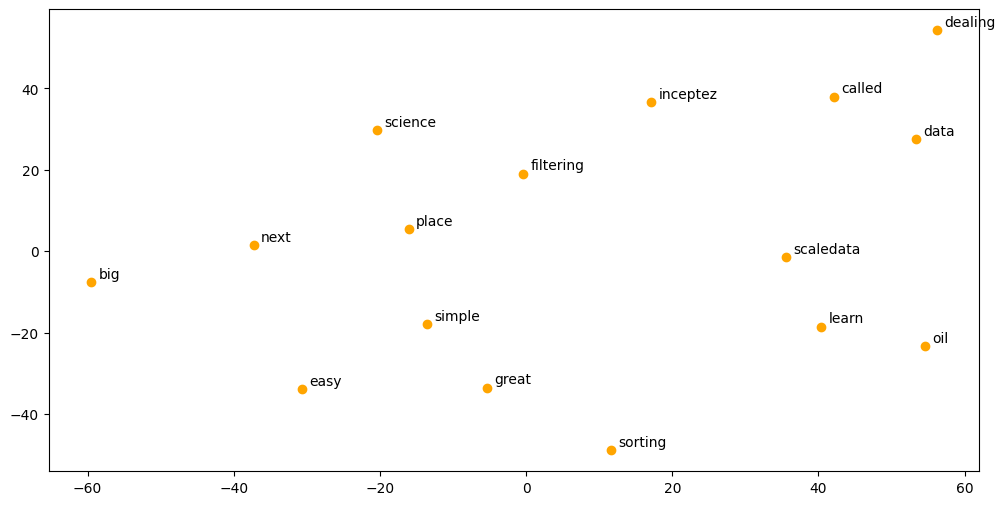

In [ ]:
plt.figure(figsize = (12,6))
plt.scatter(T[:,0],T[:,1],c= 'orange')
for label,x,y in zip(lables, T[:,0],T[:,1]):
  plt.annotate(label, xy=(x+1,y+1),xytext = (0,0),textcoords = 'offset points')

In [ ]:
from gensim.models import KeyedVectors

In [ ]:
filename = "drive/MyDrive/GoogleNews-vectors-negative300.bin.gz"

In [ ]:
model = KeyedVectors.load_word2vec_format(filename,binary = True)

In [ ]:
model['dog']

array([ 5.12695312e-02, -2.23388672e-02, -1.72851562e-01,  1.61132812e-01,
       -8.44726562e-02,  5.73730469e-02,  5.85937500e-02, -8.25195312e-02,
       -1.53808594e-02, -6.34765625e-02,  1.79687500e-01, -4.23828125e-01,
       -2.25830078e-02, -1.66015625e-01, -2.51464844e-02,  1.07421875e-01,
       -1.99218750e-01,  1.59179688e-01, -1.87500000e-01, -1.20117188e-01,
        1.55273438e-01, -9.91210938e-02,  1.42578125e-01, -1.64062500e-01,
       -8.93554688e-02,  2.00195312e-01, -1.49414062e-01,  3.20312500e-01,
        3.28125000e-01,  2.44140625e-02, -9.71679688e-02, -8.20312500e-02,
       -3.63769531e-02, -8.59375000e-02, -9.86328125e-02,  7.78198242e-03,
       -1.34277344e-02,  5.27343750e-02,  1.48437500e-01,  3.33984375e-01,
        1.66015625e-02, -2.12890625e-01, -1.50756836e-02,  5.24902344e-02,
       -1.07421875e-01, -8.88671875e-02,  2.49023438e-01, -7.03125000e-02,
       -1.59912109e-02,  7.56835938e-02, -7.03125000e-02,  1.19140625e-01,
        2.29492188e-01,  

In [ ]:
#(King - Man) + woman = Queen?

In [ ]:
result = model.most_similar(positive = ['woman','king'], negative = ['man'],topn=1)
print(result)

[('queen', 0.7118193507194519)]


In [ ]:
corpus= ["live classes is a great place to learn data science and big data",
         "data is called the next oil, so learn data science",
         "big data is the science of dealing with data at a scale"
         "data science can be simple filtering or sorting.",
         "data science is easy to learn"]

In [ ]:
corpus = np.array(corpus)
print(corpus)
normalized_corpus = pre_processing(corpus)

['live classes is a great place to learn data science and big data'
 'data is called the next oil, so learn data science'
 'big data is the science of dealing with data at a scaledata science can be simple filtering or sorting.'
 'data science is easy to learn']


100%|██████████| 4/4 [00:00<00:00, 111.60it/s]


In [ ]:
tokenized_corpus = [nltk.word_tokenize(doc) for doc in normalized_corpus]


In [ ]:
#similarity between two vectors?
#Cosine Similarity??

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

vec_df = pd.DataFrame(wvs, index = words)
similarity_matrix = cosine_similarity(vec_df)

In [ ]:
simiarity_df = pd.DataFrame(similarity_matrix,index = words, columns = words)

In [ ]:
simiarity_df

,data,science,learn,big,easy,classes,great,place,called,sorting,next,oil,dealing,scaledata,simple,filtering,live
data,1.000000,-0.200863,0.003975,-0.263103,-0.363239,-0.186258,-0.056567,0.058471,0.187927,0.141410,0.039537,-0.203473,0.425482,-0.316045,0.146874,0.004839,0.186968
science,-0.200863,1.000000,-0.064381,-0.079494,-0.000803,-0.019553,0.299614,0.065220,-0.136821,0.055429,-0.207549,-0.291312,0.036803,0.344388,0.040344,-0.013431,0.120320
learn,0.003975,-0.064381,1.000000,-0.022235,0.131700,0.044914,0.012454,0.010282,0.258637,-0.150741,0.454903,0.072238,-0.157370,-0.193131,-0.011357,-0.276549,0.040657
big,-0.263103,-0.079494,-0.022235,1.000000,0.167184,-0.137557,0.059590,0.067751,0.084520,-0.247004,-0.065583,0.153999,-0.000906,0.006238,0.130303,0.128067,-0.227485
easy,-0.363239,-0.000803,0.131700,0.167184,1.000000,0.078462,0.071285,0.331856,-0.071060,-0.077065,0.090210,0.185078,-0.105493,-0.062237,0.247441,0.200045,0.057701
classes,-0.186258,-0.019553,0.044914,-0.137557,0.078462,1.000000,-0.415089,0.135498,-0.200751,0.184816,-0.059020,0.117481,-0.413119,0.110073,0.243105,-0.293030,-0.113178
great,-0.056567,0.299614,0.012454,0.059590,0.071285,-0.415089,1.000000,0.084742,0.181740,-0.281016,0.158060,-0.036112,-0.145092,0.246155,-0.200028,0.345827,0.071448
place,0.058471,0.065220,0.010282,0.067751,0.331856,0.135498,0.084742,1.000000,0.120969,-0.166603,0.281001,0.157328,0.132928,0.376175,0.388583,0.088284,0.442240
called,0.187927,-0.136821,0.258637,0.084520,-0.071060,-0.200751,0.181740,0.120969,1.000000,0.111996,0.265938,-0.013706,0.027383,-0.115465,-0.127489,-0.196028,0.033690
sorting,0.141410,0.055429,-0.150741,-0.247004,-0.077065,0.184816,-0.281016,-0.166603,0.111996,1.000000,-0.087297,-0.041589,0.202095,-0.124968,0.037833,-0.021522,0.017869


In [ ]:
#GLOVe - Stanford NLP
#just like word 2vec - GLOVE also word vectors

In [ ]:
!python -m spacy download en_core_web_sm

2023-08-13 05:21:16.007031: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-13 05:21:20.905872: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 49.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import spacy
unique_words = list(set(word for sublist in tokenized_corpus for word in sublist))

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
word_glove_vectors = np.array([nlp(word).vector for word in unique_words])
vec_df = pd.DataFrame(word_glove_vectors, index = unique_words)

In [ ]:
vec_df

In [ ]:
tsne = TSNE(n_components = 2, n_iter=5000, random_state = 42,perplexity = 5)
T = tsne.fit_transform(word_glove_vectors)
lables = unique_words

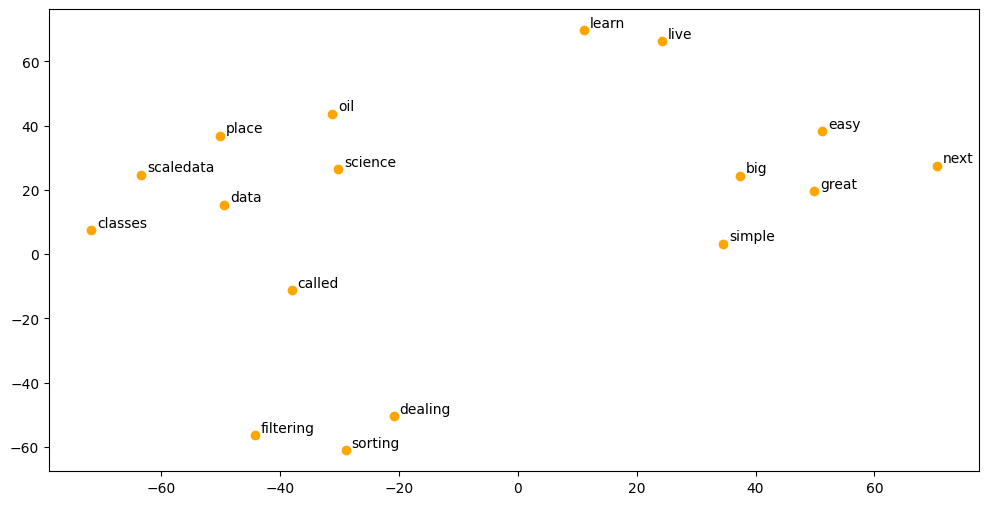

In [ ]:
plt.figure(figsize = (12,6))
plt.scatter(T[:,0],T[:,1],c= 'orange')
for label,x,y in zip(lables, T[:,0],T[:,1]):
  plt.annotate(label, xy=(x+1,y+1),xytext = (0,0),textcoords = 'offset points')

In [ ]:
!pwd

/content


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2023-08-13 05:27:40--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-08-13 05:27:40--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-08-13 05:27:41--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import one_hot,Tokenizer
from keras.utils.data_utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Embedding

In [ ]:
doc = ['Good Job!','Excellent Efforts',"Well Done!","Perfect","nice work",
       'Bad!','Poor','Weak','Very disappointed','unsatisfactory']

In [ ]:
labels = np.array([1,1,1,1,1,0,0,0,0,0])

In [ ]:
t = Tokenizer()
t.fit_on_texts(doc)

In [ ]:
vocab_size = len(t.word_index)+1

In [ ]:
vocab_size

16

In [ ]:
encoded = t.texts_to_sequences(doc)

In [ ]:
max_length = 2
padded_documents = pad_sequences(encoded, maxlen = max_length, padding = 'post')

In [ ]:
f = open("glove.6B.100d.txt")
embedding_index = dict()
for line in f:
  values = line.split()
  word  = values[0]
  coefs = np.asarray(values[1:], dtype = 'float32')
  embedding_index[word] = coefs
f.close()

In [ ]:
embedding_matrix = np.zeros((vocab_size ,100))

In [ ]:
for word, i in t.word_index.items():
  embedding_vector = embedding_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [ ]:
vocab_size

16

In [ ]:
model = Sequential()
e = Embedding(vocab_size, 100, weights = [embedding_matrix],input_length =2, trainable = False)
model.add(e)
model.add(Flatten())
model.add(Dense(1,activation = 'sigmoid'))

In [ ]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [ ]:
model.fit(padded_documents,labels,epochs = 50,verbose = 1)

Epoch 1/50
1/1 [==============================] - 1s 789ms/step - loss: 0.6048 - accuracy: 0.5000
Epoch 2/50
1/1 [==============================] - 0s 17ms/step - loss: 0.5945 - accuracy: 0.5000
Epoch 3/50
1/1 [==============================] - 0s 10ms/step - loss: 0.5843 - accuracy: 0.5000
Epoch 4/50
1/1 [==============================] - 0s 13ms/step - loss: 0.5742 - accuracy: 0.5000
Epoch 5/50
1/1 [==============================] - 0s 17ms/step - loss: 0.5643 - accuracy: 0.5000
Epoch 6/50
1/1 [==============================] - 0s 21ms/step - loss: 0.5546 - accuracy: 0.5000
Epoch 7/50
1/1 [==============================] - 0s 12ms/step - loss: 0.5450 - accuracy: 0.5000
Epoch 8/50
1/1 [==============================] - 0s 19ms/step - loss: 0.5355 - accuracy: 0.5000
Epoch 9/50
1/1 [==============================] - 0s 10ms/step - loss: 0.5262 - accuracy: 0.5000
Epoch 10/50
1/1 [==============================] - 0s 15ms/step - loss: 0.5171 - accuracy: 0.5000
Epoch 11/50
1/1 [===========

In [ ]:
loss, accuracy = model.evaluate(padded_documents, labels, verbose =1 )

1/1 [==============================] - 0s 249ms/step - loss: 0.2636 - accuracy: 1.0000


In [ ]:
#Try on - #Movie reviews???

In [ ]:
1. Information to the vector
2. Losses